In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import clean_columns
import geopandas as gpd
from shapely.geometry import MultiPolygon

In [3]:
df = pd.read_csv('My_CHI._My_Future._Programs.csv')

In [4]:
df = clean_columns(df)

39 column names have been cleaned

In [5]:
df.columns

Index(['program_id', 'program_name', 'description', 'org_name',
       'category_name', 'capacity', 'min_age', 'max_age', 'address', 'city',
       'state', 'zip_code', 'program_type', 'program_url', 'online_address',
       'registration_url', 'registration_open', 'registration_deadline',
       'start_date', 'end_date', 'start_time', 'end_time', 'contact_name',
       'contact_email', 'contact_phone', 'program_price',
       'geographic_cluster_name', 'scholarship_available', 'participants_paid',
       'transport_provided', 'has_free_food', 'meeting_type', 'image',
       'hidden_programs', 'featured', 'tag', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [6]:
df.head(1)

,program_id,program_name,description,org_name,category_name,capacity,min_age,max_age,address,city,...,transport_provided,has_free_food,meeting_type,image,hidden_programs,featured,tag,latitude,longitude,location
0,138124,How to Finally Get Consistent with Healthy Eating,During this workshop youÕll identify the main ...,Chicago Public Library,Academic Support,NaN,13,99,NaN,NaN,...,False,False,online,NaN,False,False,Event,NaN,NaN,NaN


In [7]:
df.program_name

0        How to Finally Get Consistent with Healthy Eating
1                   English Conversation with Chicago Lawn
2        Law at the Library: Changes in Tax Law, Know B...
3               Voices for Justice: Author Qian Julie Wang
4        Science Fiction & Fantasy Book Group: Dawn by ...
                               ...                        
68591                Tumbling Lev. 4 - 6 at Morgan Park SC
68592    Ice Skating - Freestyle Ice Basic1-FS6 at Morg...
68593     Ice Skating - Adult Open Skate at Morgan Park SC
68594                       Stick & Puck at Morgan Park SC
68595              Ice Skating - Basic 1 at Morgan Park SC
Name: program_name, Length: 68596, dtype: object

## Splitting Data

### Meeting Type

In [28]:
df_online = df[df['meeting_type'] == 'online']

In [29]:
df_face = df[df['meeting_type'] == 'face_to_face']

In [30]:
df_face.head(1)

,program_id,program_name,description,org_name,category_name,capacity,min_age,max_age,address,city,...,transport_provided,has_free_food,meeting_type,image,hidden_programs,featured,tag,latitude,longitude,location
135,106198,"All CPL Locations Closed Thursday, November 25","All CPL locations will be closed Thursday, Nov...",Chicago Public Library,Helping Your Community.,99.0,0,99,NaN,Chicago,...,False,False,face_to_face,NaN,False,False,Event,NaN,NaN,NaN


In [33]:
df_face.transport_provided.value_counts()

False    61234
True        69
Name: transport_provided, dtype: int64

In [34]:
# dataframe of in person programs where transportation is provided
df_tp_og_index = df[df['transport_provided'] == True]

In [35]:
# reindexing df_tp_og_index for ease of use when working with rows where transportation is provided
df_tp = df_tp_og_index.reset_index()

In [36]:
#dropping old index
df_tp = df_tp.iloc[: , 1:]

In [37]:
df_tp

,program_id,program_name,description,org_name,category_name,capacity,min_age,max_age,address,city,...,transport_provided,has_free_food,meeting_type,image,hidden_programs,featured,tag,latitude,longitude,location
0,121076,Test Program 4/21/2022-4,<p>Test for no address</p>,DYN Tech,Transportation,NaN,4,21,1234 East 56th Street,Chicago,...,True,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Program,41.793495,-87.595184,POINT (-87.595184326 41.793495178)
1,98698,Kayak and Caring for the Environment,<p>Time: 9:30 a.m. - 2:30 p.m.<br>Capacity: 15...,John G. Shedd Aquarium,Science,15.0,13,18,NaN,NaN,...,True,False,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Event,NaN,NaN,NaN
2,124453,Cannabis Legal Studies,<p><strong>Program Overview</strong></p><p>Leg...,LAW AND THE FAM ℠,Work + Career,25.0,18,25,NaN,NaN,...,True,True,online,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Job,NaN,NaN,NaN
3,98700,Kayak and Caring for the Environment,<p>Dates: Please only select one of three date...,John G. Shedd Aquarium,Nature.,15.0,13,18,NaN,NaN,...,True,False,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Event,NaN,NaN,NaN
4,127088,Chicago200,<p>Chicago200 is an annual leadership program ...,Common Purpose,Helping Your Community.,NaN,18,25,NaN,Chicago,...,True,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Event,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,134605,"Christ, Camping, & Coming of Age","<p>Two safe, fun-filled, and spiritually nurtu...",Agape Center,Nature.,12.0,11,14,9600 Wolf Road,Willow Springs,...,True,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Event,41.713299,-87.895203,POINT (-87.895202637 41.713298798)
67,134606,"Christ, Camping, & Coming of Age","<p>Two safe, fun-filled, and spiritually nurtu...",Agape Center,Sports + Wellness.,12.0,11,14,9600 Wolf Road,Willow Springs,...,True,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Event,41.713310,-87.895157,POINT (-87.89515686 41.713310242)
68,134605,"Christ, Camping, & Coming of Age","<p>Two safe, fun-filled, and spiritually nurtu...",Agape Center,Sports + Wellness.,12.0,11,14,9600 Wolf Road,Willow Springs,...,True,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Event,41.713299,-87.895203,POINT (-87.895202637 41.713298798)
69,94257,MAPSCorps @ Centers for New Horizons - Altgeld...,<p>Are you ready to build skills for your futu...,MAPSCorps,Work + Career,10.0,16,19,13107 South Ingleside Avenue,Chicago,...,True,False,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Job,41.657211,-87.599350,POINT (-87.599349976 41.657211304)


In [8]:
# there was 1 row value in the category_name column called "Computers" and 777 called "Computers." - replacing "Computer with "Computers.
df["category_name"] = df["category_name"].replace("Computers", "Computers.")

In [9]:
# 1 row value with Science + Math, split into two 
# Duplicate 
new_row = df.loc[df['category_name'] == 'Science & Math'].copy()

# Append new row
df = df.append(new_row, ignore_index=True)

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/52338994.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


In [10]:
df['program_id'].loc[df['category_name'] == 'Science & Math']

7942     76728
68596    76728
Name: program_id, dtype: int64

In [11]:
df.loc[7942, 'category_name'] = 'Science'
df.loc[68597, 'category_name'] = 'Math'

In [12]:
df.category_name.value_counts()

Sports + Wellness.          35310
Music & Art.                17274
Reading & Writing.           6830
Academic Support             2127
Science                      1311
Building & Fixing Things     1127
Computers.                   1014
Nature.                       698
Helping Your Community.       523
Performance.                  493
Work + Career                 377
Food.                         376
Healthcare                    367
Managing Money.               348
Digital Media.                169
Social Studies                162
Customer/Human Service         39
Math                           30
Teaching                       11
Transportation                  7
Law                             3
Science & Math                  1
Name: category_name, dtype: int64

Some notes / questions
1. For categories, what does the academic support category look like? Can reading & writing, social studies, science, science/math be included in academic support or should they be kept separate?


In [13]:
df.program_price.value_counts()

Free             33089
$50 or Less      24873
More Than $50     7037
Unknown           3598
Name: program_price, dtype: int64

In [181]:
program_price_grouped = df.groupby(['program_price', 'category_name'], dropna = False)

In [182]:
program_price_grouped.size()

program_price  category_name           
$50 or Less    Academic Support             559
               Building & Fixing Things     237
               Computers.                     6
               Customer/Human Service         2
               Digital Media.                38
                                           ... 
Unknown        Music & Art.                  85
               Nature.                       12
               Reading & Writing.             2
               Science                        3
               Sports + Wellness.          3408
Length: 61, dtype: int64

In [186]:
pivot_table = program_price_grouped.size().unstack('category_name')

In [187]:
pivot_table

category_name,Academic Support,Building & Fixing Things,Computers.,Customer/Human Service,Digital Media.,Food.,Healthcare,Helping Your Community.,Law,Managing Money.,...,Nature.,Performance.,Reading & Writing.,Science,Science & Math,Social Studies,Sports + Wellness.,Teaching,Transportation,Work + Career
program_price,,,,,,,,,,,,,,,,,,,,,
$50 or Less,559.0,237.0,6.0,2.0,38.0,43.0,51.0,5.0,NaN,NaN,...,222.0,95.0,109.0,208.0,NaN,1.0,18907.0,2.0,1.0,1.0
Free,575.0,706.0,759.0,29.0,52.0,287.0,276.0,384.0,2.0,235.0,...,388.0,258.0,4218.0,816.0,1.0,115.0,6916.0,3.0,6.0,211.0
More Than $50,611.0,81.0,13.0,NaN,NaN,NaN,13.0,6.0,NaN,NaN,...,30.0,77.0,7.0,17.0,NaN,NaN,5286.0,1.0,NaN,4.0
Unknown,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,NaN,2.0,3.0,NaN,NaN,3408.0,NaN,NaN,NaN


### Min Age > 25 should be discarded, Max Age > 25 should be family event

In [22]:
df_young = df.loc[df['max_age'] <= 25]
df_young = df_young.loc[df_young['min_age'] <= 25]

In [23]:
df_young.shape

(44867, 39)

In [24]:
# find the number of unique values in 'program_id'
unique_values = df_young['program_id'].nunique()

# print the result
print(unique_values)

41033


In [25]:
df_young.category_name.value_counts()

Sports + Wellness.          22535
Music & Art.                11396
Reading & Writing.           5146
Academic Support             1594
Science                       841
Building & Fixing Things      652
Computers.                    548
Nature.                       404
Helping Your Community.       381
Food.                         328
Performance.                  300
Work + Career                 249
Healthcare                    230
Digital Media.                120
Managing Money.                39
Social Studies                 30
Customer/Human Service         29
Math                           28
Transportation                  7
Teaching                        5
Law                             3
Science & Math                  1
Name: category_name, dtype: int64

## VISUALIZATIONS

### Maps

In [207]:
commareas = pd.read_csv('CommAreas.csv')

In [210]:
chicago_map = gpd.read_file('chicagomap.shp')
chicago_map['geometry'] = chicago_map['geometry'].apply(lambda x: MultiPolygon([x]) if x.geom_type == 'Polygon' else x)


In [211]:
commareas['geometry'] = chicago_map['geometry']

In [212]:
chicagogeo = gpd.GeoDataFrame(commareas, geometry='geometry')

In [215]:
chicagogeo

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN,geometry
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,MULTIPOLYGON (((-87.62879823733725 41.80189303...,0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,MULTIPOLYGON (((-87.6067081256125 41.816813770...,0,0,0,0,38,GRAND BOULEVARD,38,4.849250e+07,28196.837157,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,39,KENWOOD,39,2.907174e+07,23325.167906,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."
...,...,...,...,...,...,...,...,...,...,...,...
72,MULTIPOLYGON (((-87.69645961375822 41.70714491...,0,0,0,0,74,MOUNT GREENWOOD,74,7.558429e+07,48665.130539,"MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ..."
73,MULTIPOLYGON (((-87.64215204651398 41.68508211...,0,0,0,0,75,MORGAN PARK,75,9.187734e+07,46396.419362,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ..."
74,MULTIPOLYGON (((-87.83658087874365 41.98639611...,0,0,0,0,76,OHARE,76,3.718356e+08,173625.984660,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ..."
75,MULTIPOLYGON (((-87.65455590025104 41.99816614...,0,0,0,0,77,EDGEWATER,77,4.844999e+07,31004.830946,"MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ..."


#########################################

In [236]:
chicago_activities = gpd.GeoDataFrame(df_young, geometry=gpd.points_from_xy(df_young.longitude, df_young.latitude))
chicago_activities.crs = chicago_map.crs

# Perform the spatial join
joined_data = gpd.sjoin(chicago_map, chicago_activities, how='left', op='intersects')

/Users/ashleywitarsa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [245]:
chicago_activities = gpd.GeoDataFrame(df_young, geometry=gpd.points_from_xy(df_young.longitude, df_young.latitude))
chicago_activities.crs = chicago_map.crs

# Perform the spatial join
joined_data = gpd.sjoin(chicagogeo, chicago_activities, how='left', op='intersects')

/Users/ashleywitarsa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [248]:
joined_data

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN,...,transport_provided,has_free_food,meeting_type,image,hidden_programs,featured,tag,latitude,longitude,location
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510,...,False,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Program,41.826199,-87.621597,POINT (-87.62159729 41.826198578)
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510,...,False,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Program,41.826199,-87.621597,POINT (-87.62159729 41.826198578)
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510,...,False,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Program,41.826199,-87.621597,POINT (-87.62159729 41.826198578)
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510,...,False,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Program,41.826199,-87.621597,POINT (-87.62159729 41.826198578)
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510,...,False,False,face_to_face,NaN,False,False,Program,41.826698,-87.620499,POINT (-87.620498657 41.826698303)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,MULTIPOLYGON (((-87.80675853375328 42.00083736...,0,0,0,0,9,EDISON PARK,9,3.163631e+07,25937.226841,...,False,False,face_to_face,NaN,False,False,Program,42.004047,-87.817596,POINT (-87.817596436 42.004047394)
76,MULTIPOLYGON (((-87.80675853375328 42.00083736...,0,0,0,0,9,EDISON PARK,9,3.163631e+07,25937.226841,...,False,False,face_to_face,NaN,False,False,Program,42.004047,-87.817596,POINT (-87.817596436 42.004047394)
76,MULTIPOLYGON (((-87.80675853375328 42.00083736...,0,0,0,0,9,EDISON PARK,9,3.163631e+07,25937.226841,...,False,False,online,NaN,False,False,Program,42.004047,-87.817596,POINT (-87.817596436 42.004047394)
76,MULTIPOLYGON (((-87.80675853375328 42.00083736...,0,0,0,0,9,EDISON PARK,9,3.163631e+07,25937.226841,...,False,False,face_to_face,NaN,False,False,Program,42.004047,-87.817596,POINT (-87.817596436 42.004047394)


In [237]:
from fuzzywuzzy import fuzz, process

def match_column(row, column, options):
    best_match = process.extractOne(row[column], options)
    return best_match[0]

chicagogeo['GEOG'] = chicagogeo.apply(match_column, args=('COMMUNITY', dem['GEOG']), axis=1)

joined = pd.merge(chicagogeo, dem, on='GEOG')

,geometry,index_right,program_id,program_name,description,org_name,category_name,capacity,min_age,max_age,...,transport_provided,has_free_food,meeting_type,image,hidden_programs,featured,tag,latitude,longitude,location
0,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",40782.0,123933.0,Bronzeville Youth Shelter,"<p>BYS provides minor youth, ages 14 to 17, wi...",Ignite,Helping Your Community.,NaN,14.0,17.0,...,False,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Program,41.826199,-87.621597,POINT (-87.62159729 41.826198578)
0,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",41703.0,123927.0,Ignite Belfort House,<p>Located in Chicago’s Bronzeville neighborho...,Ignite,Helping Your Community.,NaN,18.0,22.0,...,False,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Program,41.826199,-87.621597,POINT (-87.62159729 41.826198578)
0,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",43603.0,123927.0,Ignite Belfort House,<p>Located in Chicago’s Bronzeville neighborho...,Ignite,Helping Your Community.,NaN,18.0,22.0,...,False,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Program,41.826199,-87.621597,POINT (-87.62159729 41.826198578)
0,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",42102.0,123933.0,Bronzeville Youth Shelter,"<p>BYS provides minor youth, ages 14 to 17, wi...",Ignite,Helping Your Community.,NaN,14.0,17.0,...,False,True,face_to_face,https://cityoflearning-uploads.s3.amazonaws.co...,False,False,Program,41.826199,-87.621597,POINT (-87.62159729 41.826198578)
0,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",41939.0,107719.0,Bitty Basketball at Anderson,"With lowered rims and smaller balls, this inst...",Chicago Park District,Sports + Wellness.,15.0,3.0,6.0,...,False,False,face_to_face,NaN,False,False,Program,41.826698,-87.620499,POINT (-87.620498657 41.826698303)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,"MULTIPOLYGON (((-87.80676 42.00084, -87.80676 ...",58601.0,152120.0,Science of Superheroes at Edison,Every hero has a story. Children will become ...,Chicago Park District,Music & Art.,10.0,3.0,6.0,...,False,False,face_to_face,NaN,False,False,Program,42.004047,-87.817596,POINT (-87.817596436 42.004047394)
76,"MULTIPOLYGON (((-87.80676 42.00084, -87.80676 ...",57055.0,152756.0,Art & ABCs at Edison,Kids will get crafty and participate in activi...,Chicago Park District,Music & Art.,12.0,3.0,6.0,...,False,False,face_to_face,NaN,False,False,Program,42.004047,-87.817596,POINT (-87.817596436 42.004047394)
76,"MULTIPOLYGON (((-87.80676 42.00084, -87.80676 ...",58938.0,88777.0,Young Scientist at Online,Join Barbara for Young Scientist online! This...,Chicago Park District,Science,20.0,3.0,6.0,...,False,False,online,NaN,False,False,Program,42.004047,-87.817596,POINT (-87.817596436 42.004047394)
76,"MULTIPOLYGON (((-87.80676 42.00084, -87.80676 ...",55944.0,153205.0,Little Artists at Edison,Involves children learning and experiencing ar...,Chicago Park District,Music & Art.,12.0,3.0,6.0,...,False,False,face_to_face,NaN,False,False,Program,42.004047,-87.817596,POINT (-87.817596436 42.004047394)


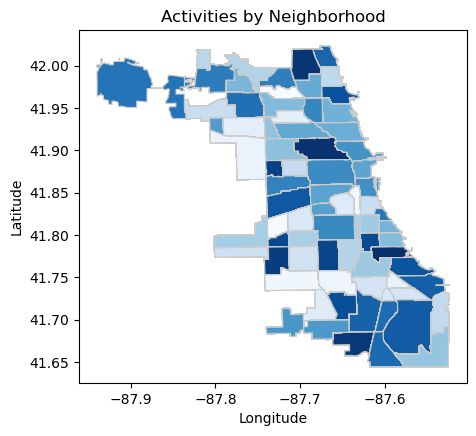

In [252]:
ax = joined_data.plot(column='COMMUNITY',cmap='Blues', linewidth=0.8, edgecolor='0.8', figsize=(5,5))
ax.set_title('Activities by Neighborhood')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/1270174637.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


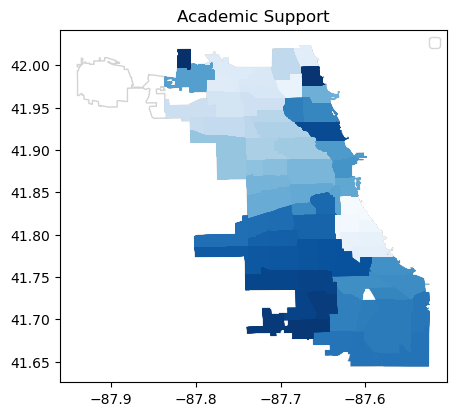

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/1270174637.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


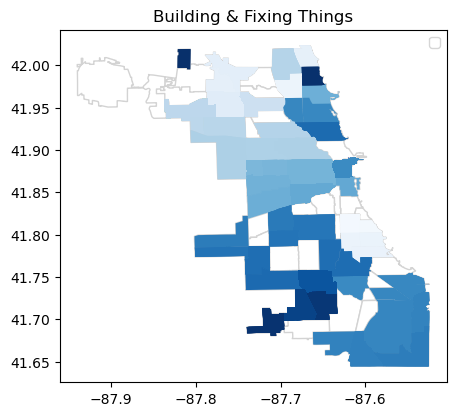

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/1270174637.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


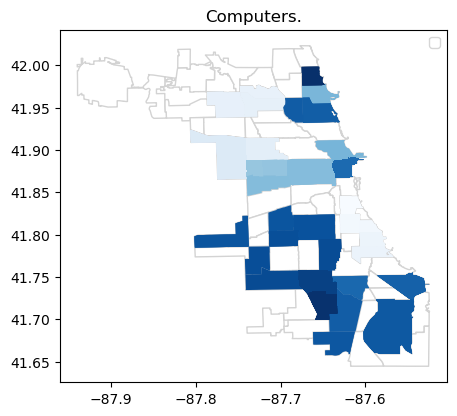

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/1270174637.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


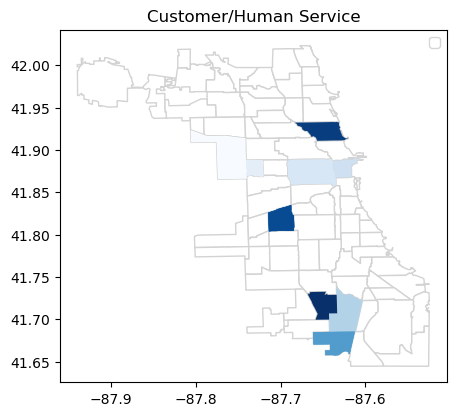

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/1270174637.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


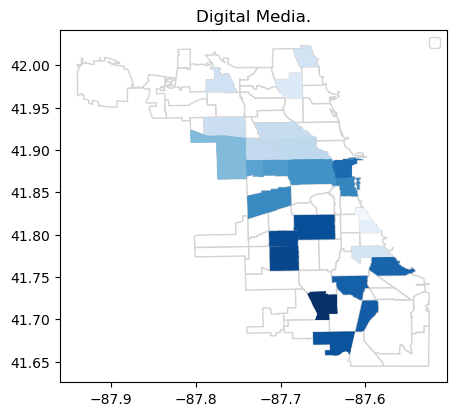

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/1270174637.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


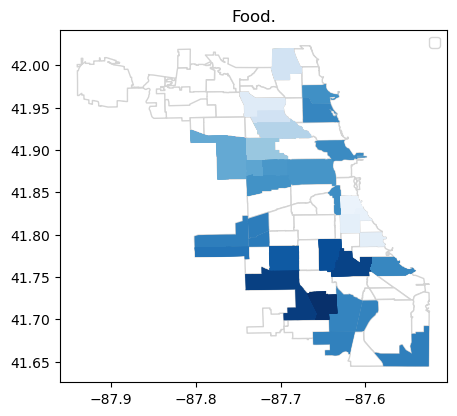

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/1270174637.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


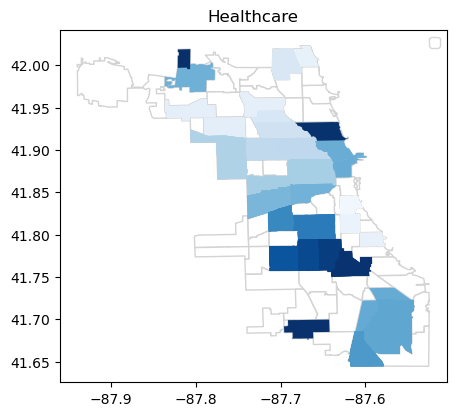

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/1270174637.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


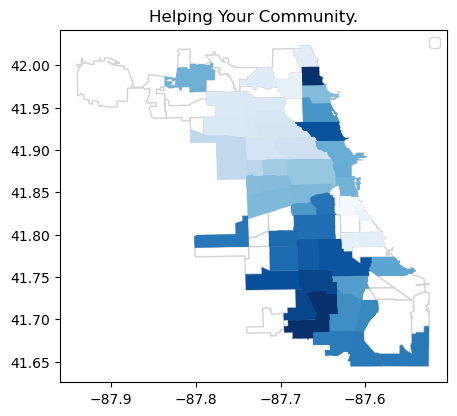

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/1270174637.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


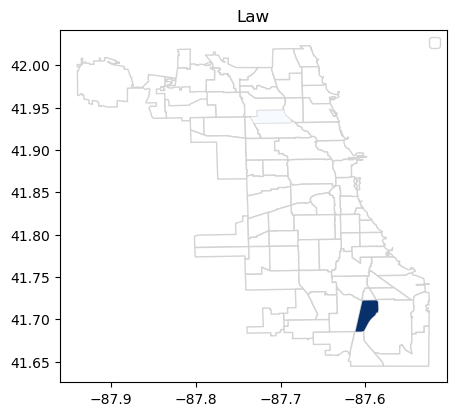

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/1270174637.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


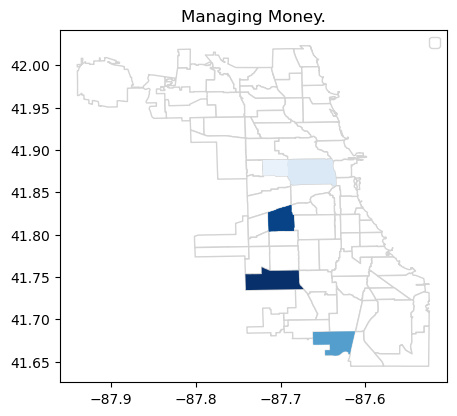

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/1270174637.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


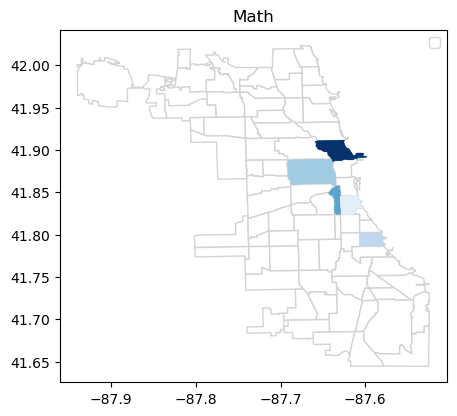

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/1270174637.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


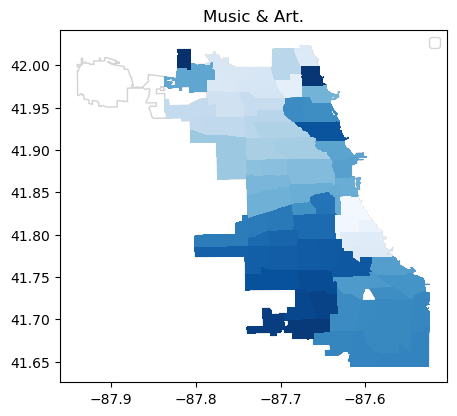

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/1270174637.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


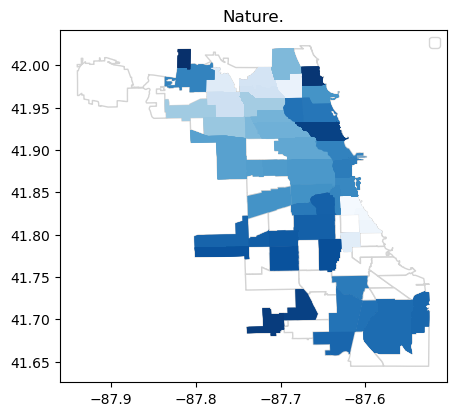

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/1270174637.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


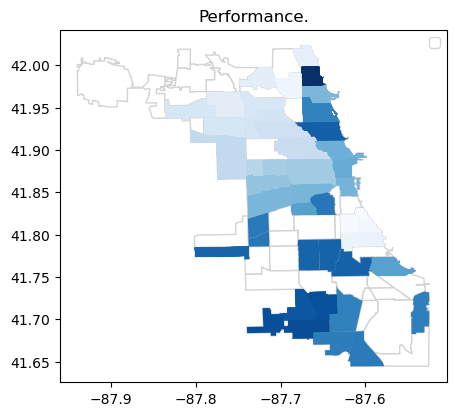

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/1270174637.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


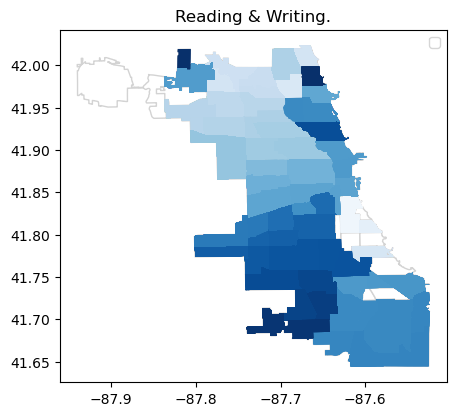

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/1270174637.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


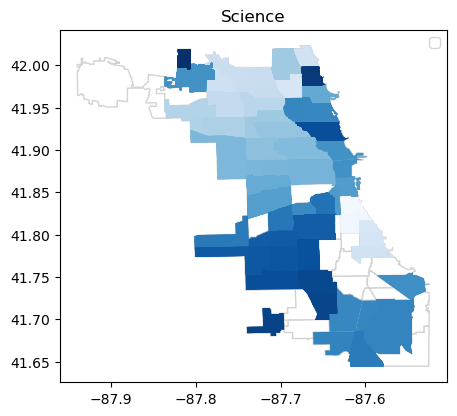

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_40652/1270174637.py:7: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


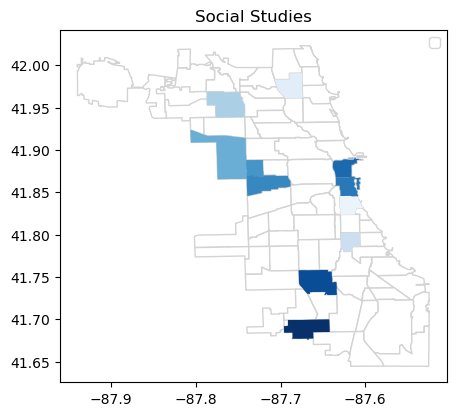

KeyboardInterrupt: 

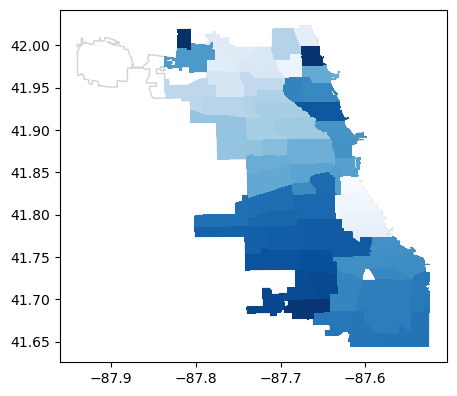

In [52]:
for group, data in joined_data.groupby('category_name'):
    # Plot the group with a different color and marker size
    fig, ax = plt.subplots(figsize=(5,5))
    chicago_map.plot(ax=ax, color='white', edgecolor='lightgrey', legend=True)
    data.plot(ax=ax, cmap='Blues', markersize=50)
    plt.title(group)
    plt.legend() 
    plt.show()

In [62]:
demographics = pd.read_csv('chicagodemographics.csv')

In [63]:
dem = demographics.drop([ '2000_POP', '2010_POP','A35_49','A50_64','A65_74','A75_84','OV85',
                  'RET_SALES','GEN_MERCH','RES_EAV','CMRCL_EAV','IND_EAV','RAIL_EAV','FARM_EAV','MIN_EAV','TOT_EAV',
                  '2000_UND19','2000_A20_34','2000_A35_49','2000_A50_64','2000_OV65','2000_MED_AGE','2000_TOT_HH','2000_OWN_OCC_HU','2000_RENT_OCC_HU','2000_VAC_HU','2000_HU_TOT','2000_LT_HS','2000_HS','2000_SOME_COLL','2000_ASSOC','2000_BACH','2000_GRAD_PROF','2000_POP_25OV','HT_Cost_Typical','HT_Cost_Mod','H_Cost_Typical','H_Cost_Mod','T_Cost_Typical','T_Cost_Mod'], axis =1)

In [223]:
from fuzzywuzzy import fuzz, process

def match_column(row, column, options):
    best_match = process.extractOne(row[column], options)
    return best_match[0]

chicagogeo['GEOG'] = chicagogeo.apply(match_column, args=('COMMUNITY', dem['GEOG']), axis=1)

joined = pd.merge(chicagogeo, dem, on='GEOG')

In [219]:
#joined = chicagogeo.merge(dem, left_on='COMMUNITY', right_on='GEOG', how='right')

#### Unemployment Rate

In [225]:
joined['unemployment_rate'] = joined['UNEMP'] / joined['IN_LBFRC']

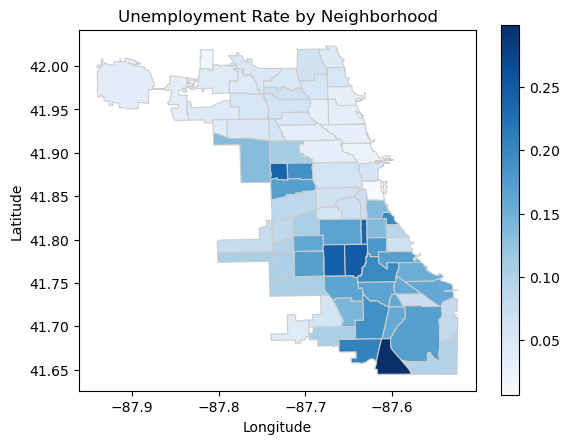

In [226]:
ax = joined.plot(column='unemployment_rate', cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True)

# Set plot title and axis labels
ax.set_title('Unemployment Rate by Neighborhood')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

legend = ax.get_legend()
plt.show()


#### % POC by Neighborhood

In [227]:
joined['pct_poc'] = (joined['HISP'] + joined['BLACK'] + joined['ASIAN'] + joined['OTHER']) / (joined['WHITE'] + joined['HISP'] + joined['BLACK'] + joined['ASIAN'] + joined['OTHER'])

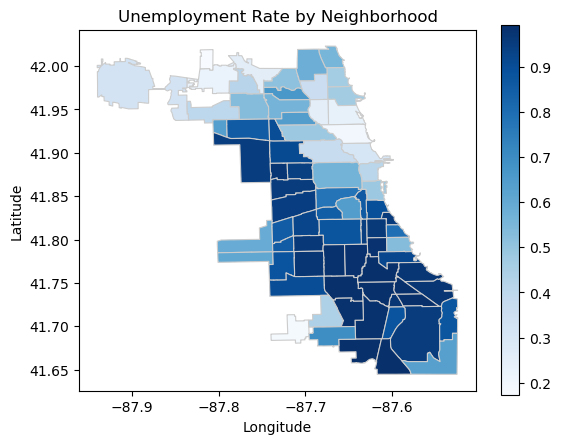

In [228]:
ax = joined.plot(column='pct_poc', cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True)

# Set plot title and axis labels
ax.set_title('Unemployment Rate by Neighborhood')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

legend = ax.get_legend()
plt.show()

#### Median Income by Neighborhood

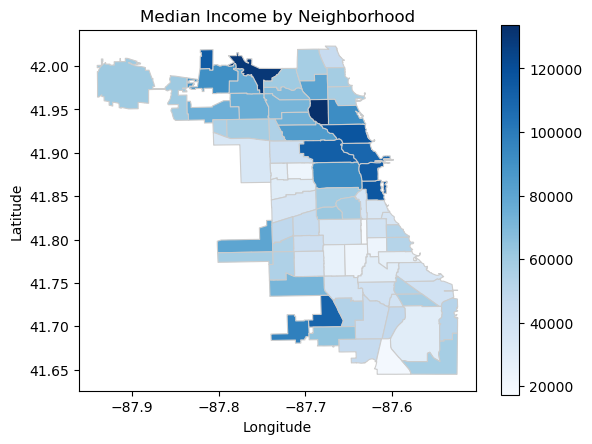

In [230]:
ax = joined.plot(column='MEDINC', cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True)

# Set plot title and axis labels
ax.set_title('Median Income by Neighborhood')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

legend = ax.get_legend()
plt.show()

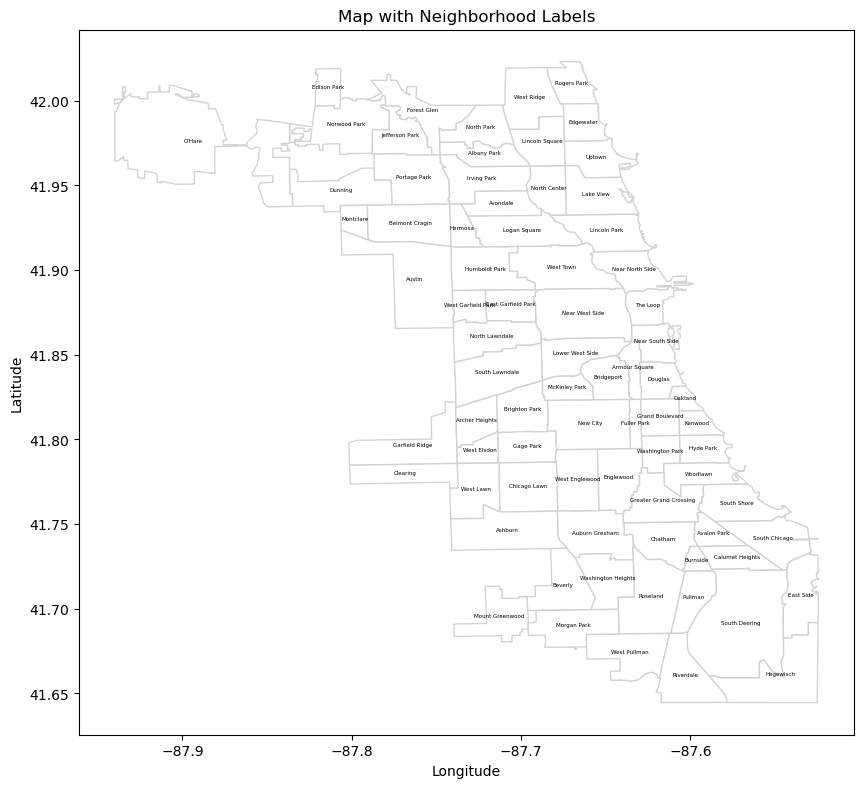

In [231]:
fig, ax = plt.subplots(figsize=(10, 10))

joined.plot(ax=ax, color='white', edgecolor='lightgrey')

for idx, row in joined.iterrows():
    if row['geometry'] is not None:
        centroid = row['geometry'].centroid.coords[0]
        ax.annotate(text=row['GEOG'], xy=centroid, color='black', fontsize=4, ha='center')

# Set plot title and axis labels
ax.set_title('Map with Neighborhood Labels')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


### Meeting Types

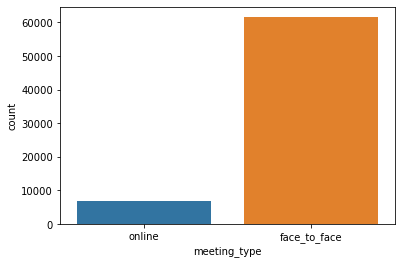

In [19]:
# Count based on meeting types
sns.countplot(x='meeting_type', data=df)
plt.show()

### Top Categories

In [84]:
df_young['category_name'].value_counts().head(5)

Sports + Wellness.    22529
Music & Art.          11388
Reading & Writing.     5145
Academic Support       1593
Science                 841
Name: category_name, dtype: int64

In [85]:
# Create a new DataFrame from the top 5 values
df_top_5 = pd.DataFrame({'column_name': df_young['category_name'].value_counts().head(5).index, 'count': df_young['category_name'].value_counts().head(5).values})


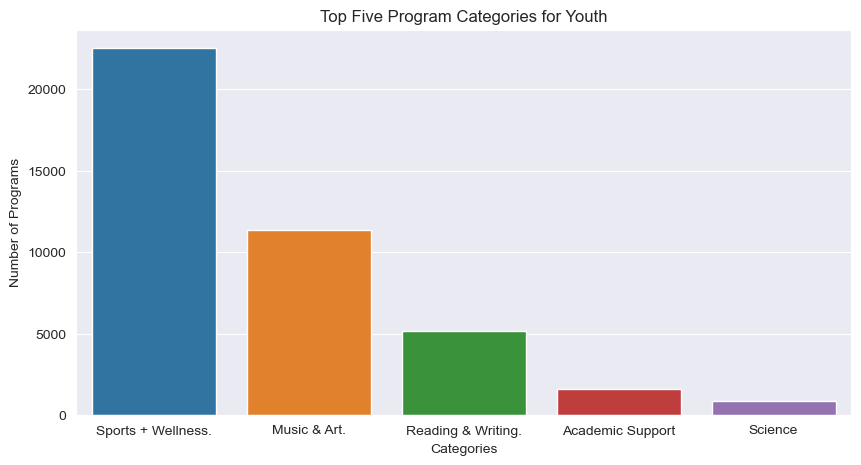

In [86]:
# Count based on category name
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
sns.barplot(x='column_name', y = 'count', data = df_top_5)
plt.xlabel('Categories')
plt.ylabel('Number of Programs')
plt.title('Top Five Program Categories for Youth')
plt.show()

## Binning Data

In [97]:
df_young['age_binned'] = pd.qcut(df_young['max_age'], q=5, labels=['(0-5]', '(5-10]', '(10-15]', '(15-20]', '(20-24]'])

/var/folders/8n/jcf8jkgd07q33yx5hgq1969r0000gn/T/ipykernel_93018/1598739233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_young['age_binned'] = pd.qcut(df_young['max_age'], q=5, labels=['(0-5]', '(5-10]', '(10-15]', '(15-20]', '(20-24]'])


Text(0.5, 1.0, 'No. of Programs Available per Age Group')

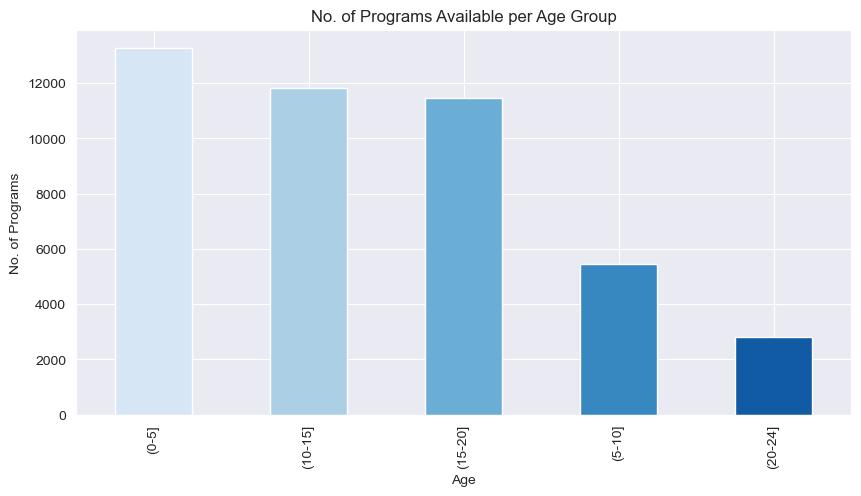

In [101]:
age_count = df_young['age_binned'].value_counts()
plt.figure(figsize=(10, 5))

age_count.plot(kind='bar', color=sns.color_palette('Blues', len(age_count)))
plt.xlabel('Age')
plt.ylabel('No. of Programs')
plt.title('No. of Programs Available per Age Group')

### Top Categories per Age Group

In [115]:
# Creating separate dataframes per age group 
df_0_5 = df_young.loc[df_young['age_binned'] == '(0-5]'] 
df_5_10 = df_young.loc[df_young['age_binned'] == '(5-10]'] 
df_10_15 = df_young.loc[df_young['age_binned'] == '(10-15]'] 
df_15_20 = df_young.loc[df_young['age_binned'] == '(15-20]'] 
df_20_24 = df_young.loc[df_young['age_binned'] == '(20-24]'] 


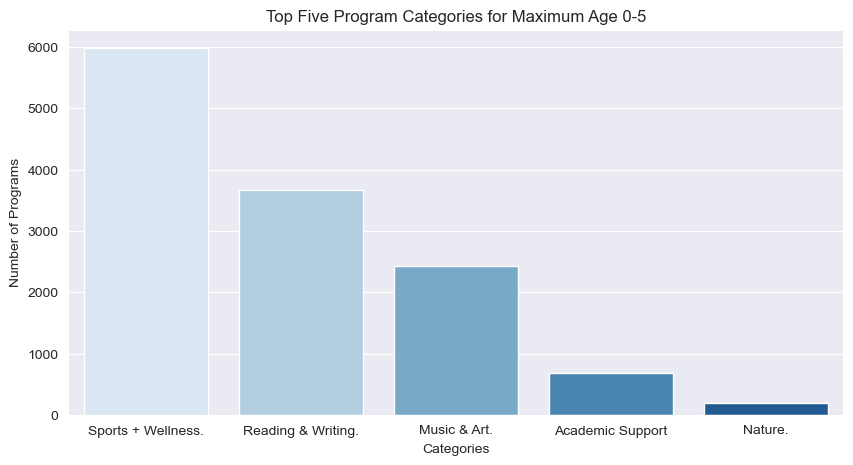

In [109]:
# 0 to 5
top_0_5 = pd.DataFrame({'column_name': df_0_5['category_name'].value_counts().head(5).index, 
                         'count': df_0_5['category_name'].value_counts().head(5).values})
# Count based on category name
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
sns.barplot(x='column_name', y = 'count', data = top_0_5, palette = 'Blues')

plt.xlabel('Categories')
plt.ylabel('Number of Programs')
plt.title('Top Five Program Categories for Maximum Age 0-5')
plt.show()

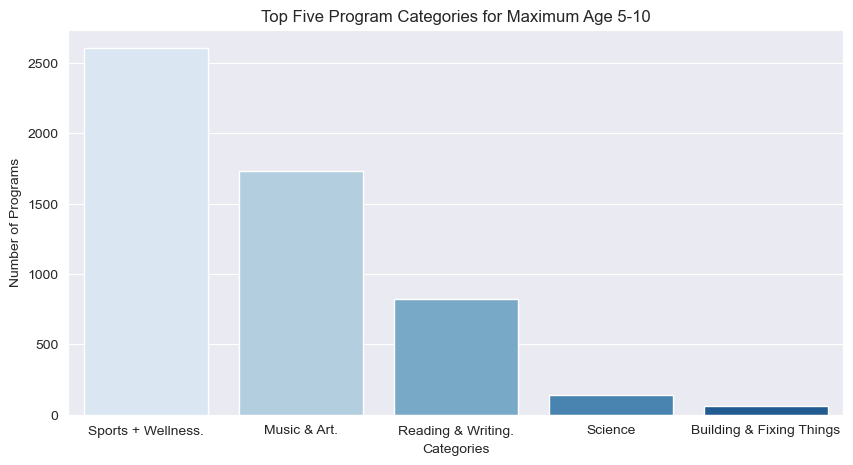

In [111]:
# 5 to 10
top_5_10 = pd.DataFrame({'column_name': df_5_10['category_name'].value_counts().head(5).index, 
                         'count': df_5_10['category_name'].value_counts().head(5).values})
# Count based on category name
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
sns.barplot(x='column_name', y = 'count', data = top_5_10, palette = 'Blues')
plt.xlabel('Categories')
plt.ylabel('Number of Programs')
plt.title('Top Five Program Categories for Maximum Age 5-10')
plt.show()

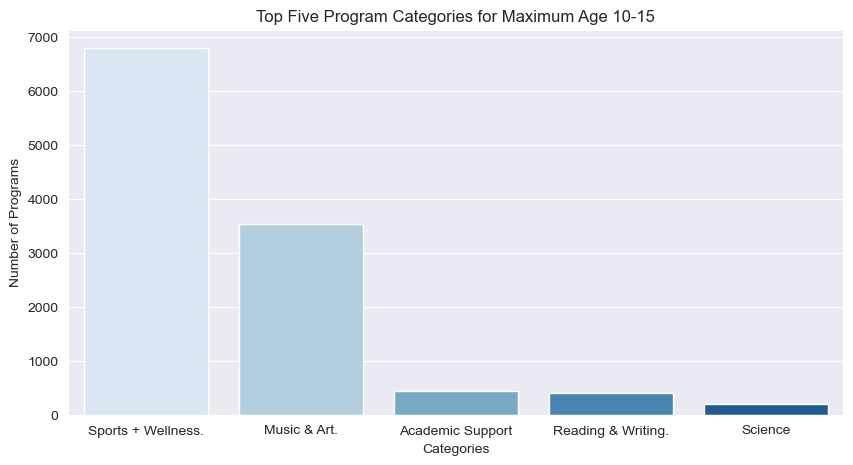

In [112]:
# 10 to 15
top_10_15 = pd.DataFrame({'column_name': df_10_15['category_name'].value_counts().head(5).index, 
                         'count': df_10_15['category_name'].value_counts().head(5).values})
# Count based on category name
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
sns.barplot(x='column_name', y = 'count', data = top_10_15, palette = 'Blues')
plt.xlabel('Categories')
plt.ylabel('Number of Programs')
plt.title('Top Five Program Categories for Maximum Age 10-15')
plt.show()

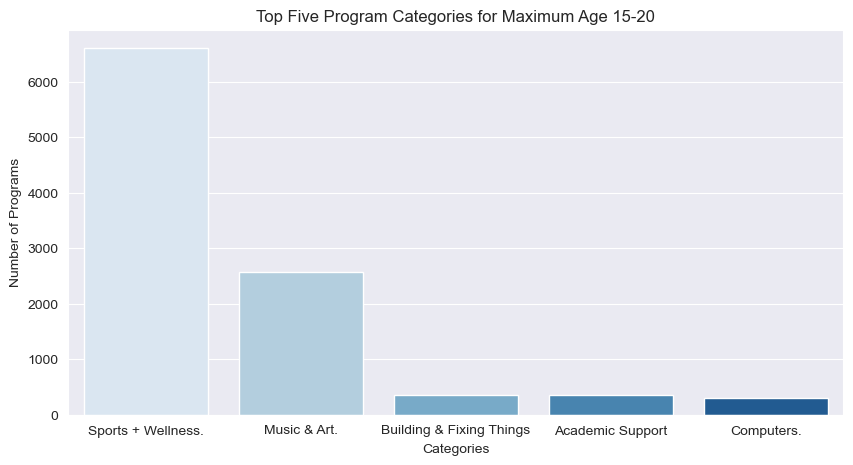

In [113]:
# 5 to 10
top_15_20 = pd.DataFrame({'column_name': df_15_20['category_name'].value_counts().head(5).index, 
                         'count': df_15_20['category_name'].value_counts().head(5).values})
# Count based on category name
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
sns.barplot(x='column_name', y = 'count', data = top_15_20, palette = 'Blues')
plt.xlabel('Categories')
plt.ylabel('Number of Programs')
plt.title('Top Five Program Categories for Maximum Age 15-20')
plt.show()

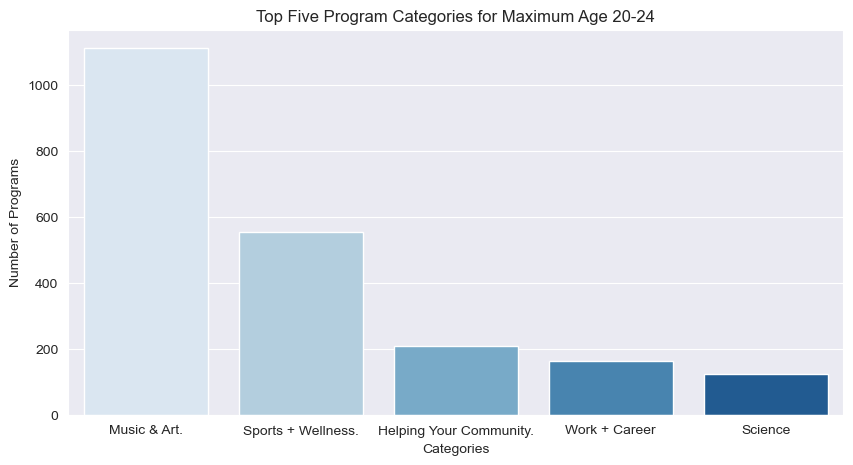

In [116]:
# 20 to 24
top_20_24 = pd.DataFrame({'column_name': df_20_24['category_name'].value_counts().head(5).index, 
                         'count': df_20_24['category_name'].value_counts().head(5).values})
# Count based on category name
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
sns.barplot(x='column_name', y = 'count', data = top_20_24, palette = 'Blues')
plt.xlabel('Categories')
plt.ylabel('Number of Programs')
plt.title('Top Five Program Categories for Maximum Age 20-24')
plt.show()

In [117]:
df_young.program_price.value_counts()

Free             20963
$50 or Less      15949
More Than $50     5679
Unknown           2239
Name: program_price, dtype: int64

In [152]:
program_price_grouped = df_young.groupby([ 'category_name', 'program_price'], dropna = False)

In [153]:
program_price_counts = program_price_grouped.size().reset_index(name='count')

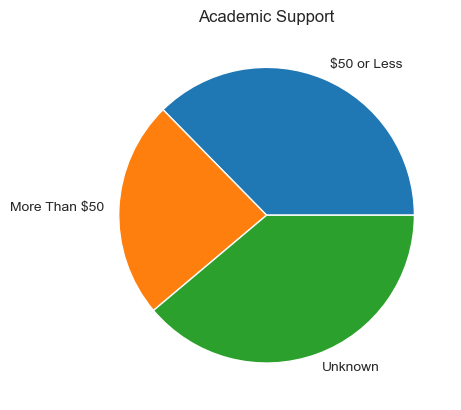

In [164]:
plt.pie(program_price_counts['count'].loc[program_price_counts['category_name'] == 'Academic Support'], 
        labels=['$50 or Less', 'More Than $50', 'Unknown'])
plt.title('Academic Support')
plt.show()

In [173]:
categories = program_price_counts['category_name'].unique()
program_price_counts['program_price'].loc[program_price_counts['category_name'] == 'Building & Fixing Things'].tolist()

['$50 or Less', 'Free', 'More Than $50', 'Unknown']

In [171]:
categories = program_price_counts['category_name'].unique()
categories

array(['Academic Support', 'Building & Fixing Things', 'Computers.',
       'Customer/Human Service', 'Digital Media.', 'Food.', 'Healthcare',
       'Helping Your Community.', 'Law', 'Managing Money.', 'Math',
       'Music & Art.', 'Nature.', 'Performance.', 'Reading & Writing.',
       'Science', 'Science & Math', 'Social Studies',
       'Sports + Wellness.', 'Teaching', 'Transportation',
       'Work + Career', nan], dtype=object)

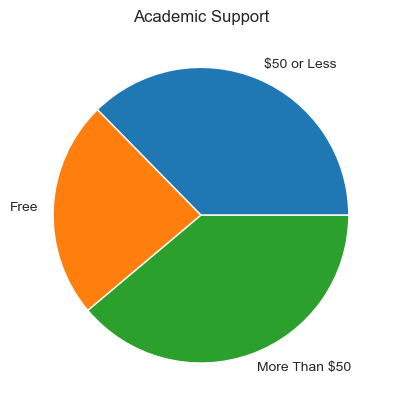

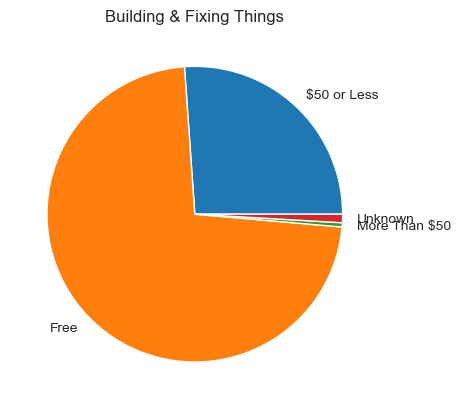

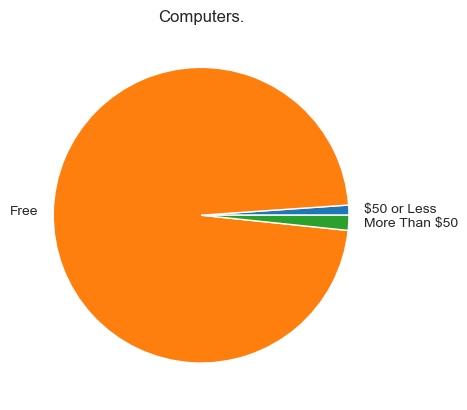

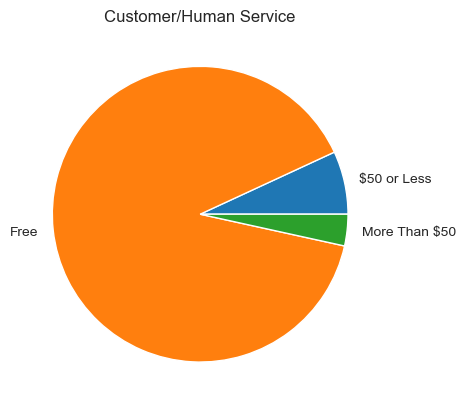

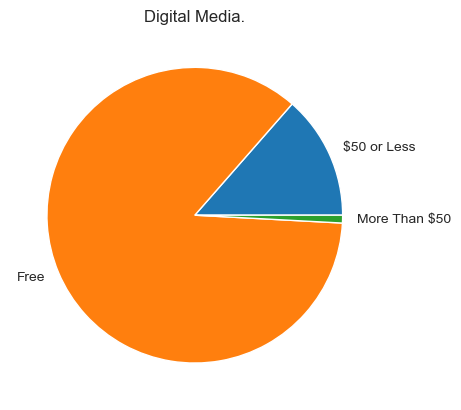

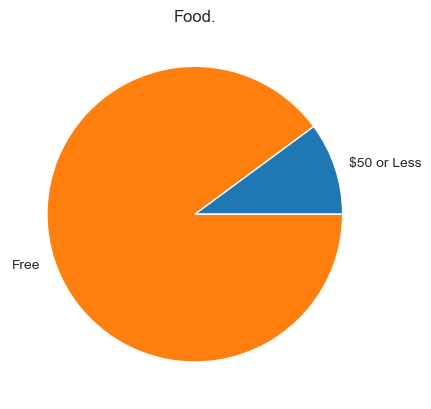

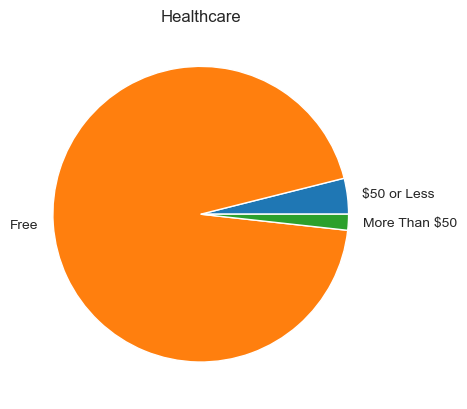

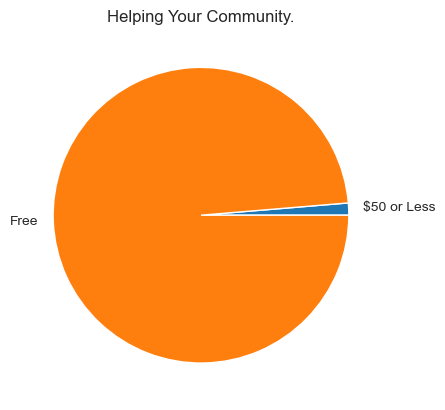

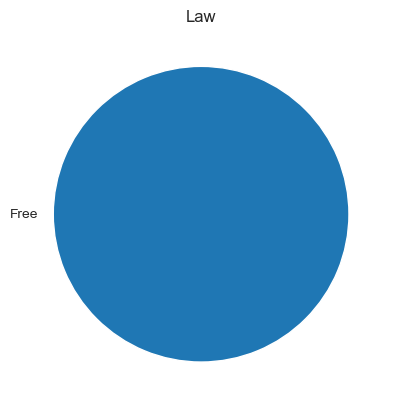

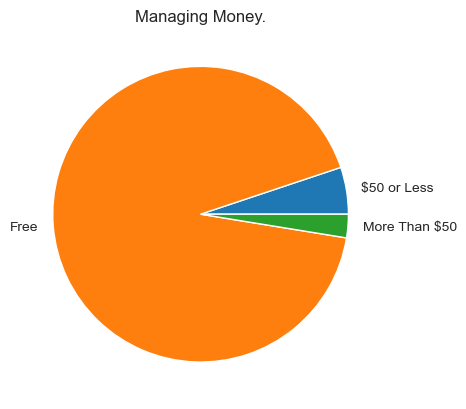

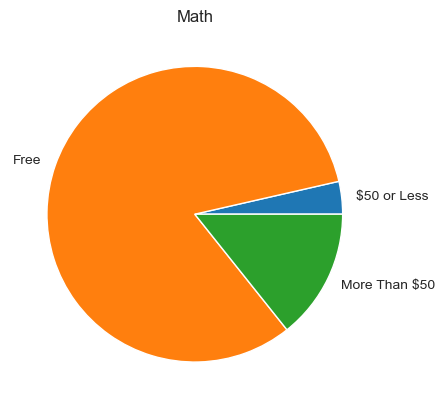

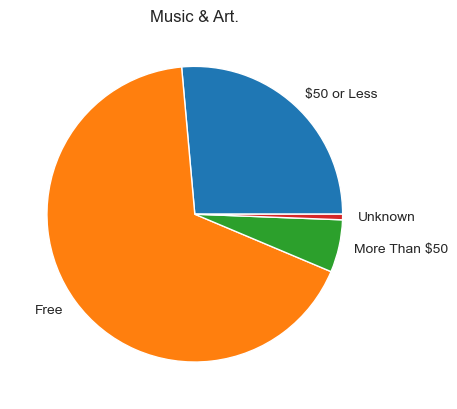

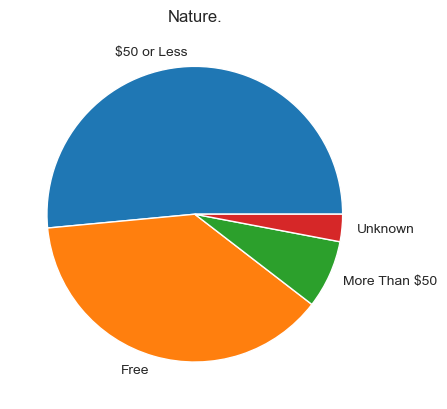

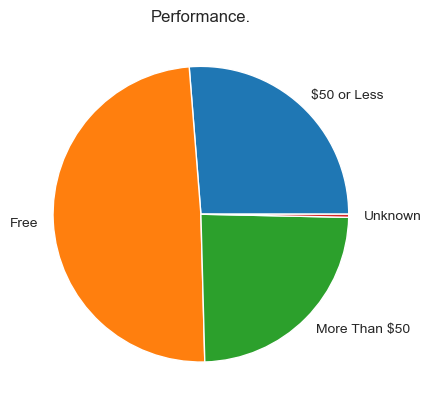

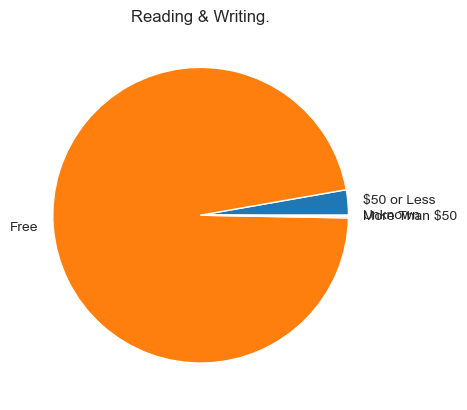

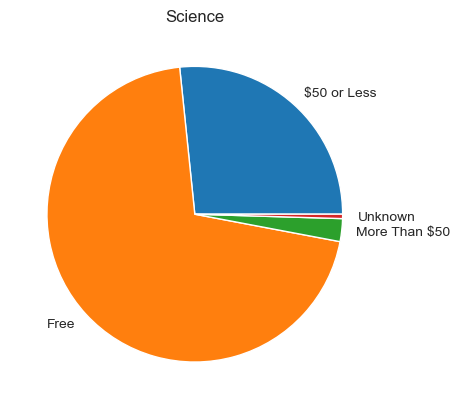

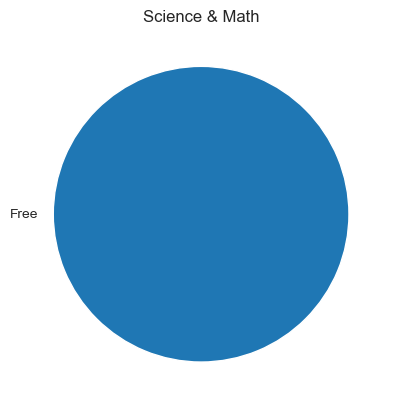

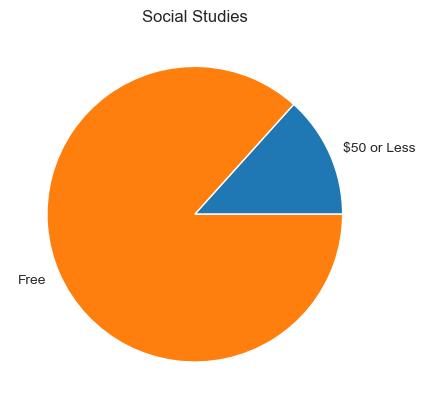

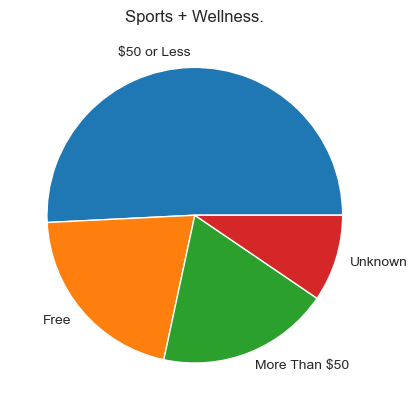

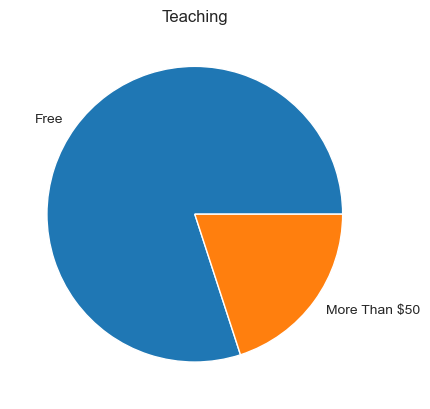

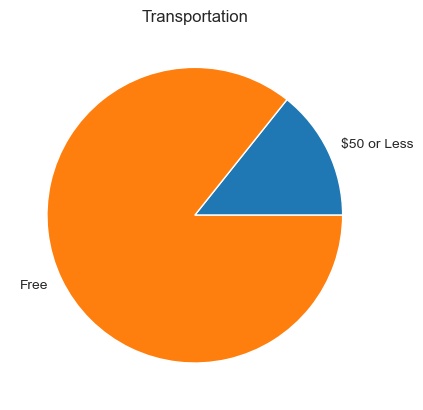

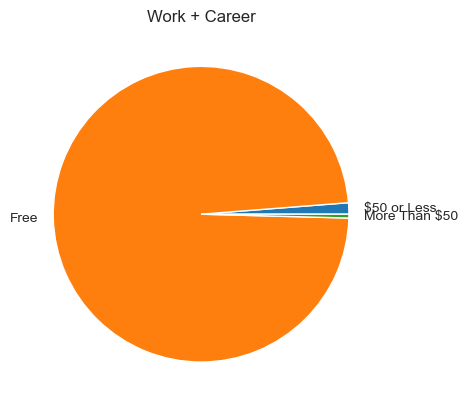

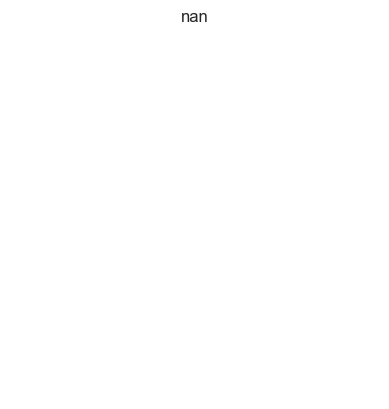

In [179]:
categories = program_price_counts['category_name'].unique()
for cat in categories:
    # Get the data for the current category    
    # Create a pie chart
    colors = sns.color_palette('pastel')
    plt.pie(program_price_counts['count'].loc[program_price_counts['category_name'] == cat], 
            labels=program_price_counts['program_price'].loc[program_price_counts['category_name'] == cat].tolist(),
            )
    plt.title(f'{cat}')
    plt.show()

In [128]:
df_young.to_csv('MCMF Young.csv', index=False)